<a href="https://colab.research.google.com/github/Asmaaad37/Machine-Learning/blob/main/Online_Payments_Fraud_Detection_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Online Payments Fraud Detection with Machine Learning

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv("credit card.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [22]:
# Let's check for null values
data.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [16]:
# Removing the null value rows.
data = data.dropna()

In [18]:
# Exploring transaction type
data.type.value_counts()

,count
type,
CASH_OUT,248395
PAYMENT,233733
CASH_IN,151691
TRANSFER,57175
DEBIT,4956


In [19]:
type = data["type"].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
fig = px.pie(
    data,
    values = quantity,
    names = transactions,
    hole = 0.5,
    title = "Distribution of transaction type"
)

fig.show()

In [21]:
# Checking correlation of the features in the data with the isFraud column.
# Select only numerical columns before calculating correlation
numerical_data = data.select_dtypes(include=np.number)

correlation = numerical_data.corr()
correlation["isFraud"].sort_values(ascending=False)

,isFraud
isFraud,1.000000
amount,0.067746
step,0.001378
oldbalanceOrg,0.000415
newbalanceDest,-0.000918
oldbalanceDest,-0.004884
newbalanceOrig,-0.007089
isFlaggedFraud,NaN


In [23]:
# Let's transform the categorical features into numerical.
data["type"] = data["type"].map({
    "CASH_OUT": 1, "PAYMENT":2,
    "CASH_IN":3, "TRANSFER":4,
    "DEBIT": 5})

data["isFraud"] = data["isFraud"].map({
    0: "No Fraud", 1: "Fraud"})

data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud,0.0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud,0.0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0.0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0.0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud,0.0


# Fraud Detection Model

In [26]:
# let's train a classification model, but before that I will split the data into training and test sets:
# Splitting the data
from sklearn.model_selection import train_test_split
X = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])

In [27]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.9995833033982326


In [28]:
# Now let’s classify whether a transaction is a fraud or not by feeding about a transaction into the model:
# Predictions.
# features = [type, amount, oldbalanceOrg, newbalanceOrig]
features = np.array([[4, 9000.60, 9000.60, 0.0]])
model.predict(features)

array(['Fraud'], dtype=object)

In [29]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions on the test set
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Fraud       0.72      0.53      0.61        43
    No Fraud       1.00      1.00      1.00     69552

    accuracy                           1.00     69595
   macro avg       0.86      0.77      0.81     69595
weighted avg       1.00      1.00      1.00     69595



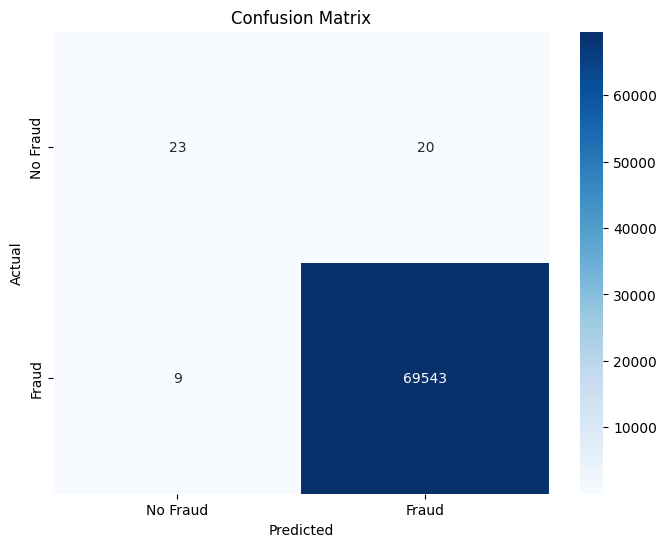

In [30]:
# Generate confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()